<a href="https://colab.research.google.com/github/Ashraf-Saleheen/forage-lyft-starter-repo/blob/main/BigMartSalesPrediciton2of2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_train= pd.read_csv('/content/Train.csv')
df_test= pd.read_csv('/content/Test.csv')

In [ ]:
df_train.head

<bound method NDFrame.head of      Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.000000   
4              NCD19        8.930          Low Fat         0.000000   
...              ...          ...              ...              ...   
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049   

In [ ]:
df_train.describe()

Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  7060.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.643456         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       8.773750         0.026989    93.826500                1987.000000   
50%      12.600000         0.053931   143.012800                1999.000000   
75%      16.850000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800

In [ ]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [ ]:
df_train.describe()

Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  7060.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.643456         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       8.773750         0.026989    93.826500                1987.000000   
50%      12.600000         0.053931   143.012800                1999.000000   
75%      16.850000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800

In [ ]:
df_train['Item_Weight'].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [ ]:
df_train['Item_Weight'].fillna(df_train['Item_Weight'].mean(), inplace= True)
df_test['Item_Weight'].fillna(df_test['Item_Weight'].mean(), inplace= True)

In [ ]:
df_train

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.000000   
4              NCD19        8.930          Low Fat         0.000000   
...              ...          ...              ...              ...   
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049   
1               Soft Drinks   48.2692            OUT018   
2                      Meat  141.6180            OUT049   
3     Fruits and Vegetables  182.0950            OUT010   
4                 Household   53.8614            OUT013   
...                     ...       ...               ...   
8518            Snack Foods  214.5218            OUT013   
8519           Baking Goods  108.1570            OUT045   
8520     Health and Hygiene   85.1224            OUT035   
8521            Snack Foods  103.1332            OUT018   
8522            Soft Drinks   75.4670            OUT046   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                          1999      Medium               Tier 1   
1                          2009      Medium               Tier 3   
2                          1999      Medium               Tier 1   
3                          1998         NaN               Tier 3   
4                          1987        High               Tier 3   
...                         ...         ...                  ...   
8518                       1987        High               Tier 3   
8519                       2002         NaN               Tier 2   
8520                       2004       Small               Tier 2   
8521                       2009      Medium               Tier 3   
8522                       1997       Small               Tier 1   

            Outlet_Type  Item_Outlet_Sales  
0     Supermarket Type1          3735.1380  
1     Supermarket Type2           443.4228  
2     Supermarket Type1          2097.2700  
3         Grocery Store           732.3800  
4     Supermarket Type1           994.7052  
...                 ...                ...  
8518  Supermarket Type1          2778.3834  
8519  Supermarket Type1           549.2850  
8520  Supermarket Type1          1193.1136  
8521  Supermarket Type2          1845.5976  
8522  Supermarket Type1           765.6700  

[8523 rows x 12 columns]

In [ ]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
df_train['Item_Weight'].describe()

count    8523.000000
mean       12.857645
std         4.226124
min         4.555000
25%         9.310000
50%        12.857645
75%        16.000000
max        21.350000
Name: Item_Weight, dtype: float64

In [ ]:
# Outlet Size is categorical column so we shall fill it with Mode imputation

df_train['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [ ]:
df_train['Outlet_Size'].fillna(df_train['Outlet_Size'].mode()[0], inplace=True)
df_test['Outlet_Size'].fillna(df_test['Outlet_Size'].mode()[0], inplace=True)

In [ ]:
df_train

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.000000   
4              NCD19        8.930          Low Fat         0.000000   
...              ...          ...              ...              ...   
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049   
1               Soft Drinks   48.2692            OUT018   
2                      Meat  141.6180            OUT049   
3     Fruits and Vegetables  182.0950            OUT010   
4                 Household   53.8614            OUT013   
...                     ...       ...               ...   
8518            Snack Foods  214.5218            OUT013   
8519           Baking Goods  108.1570            OUT045   
8520     Health and Hygiene   85.1224            OUT035   
8521            Snack Foods  103.1332            OUT018   
8522            Soft Drinks   75.4670            OUT046   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                          1999      Medium               Tier 1   
1                          2009      Medium               Tier 3   
2                          1999      Medium               Tier 1   
3                          1998      Medium               Tier 3   
4                          1987        High               Tier 3   
...                         ...         ...                  ...   
8518                       1987        High               Tier 3   
8519                       2002      Medium               Tier 2   
8520                       2004       Small               Tier 2   
8521                       2009      Medium               Tier 3   
8522                       1997       Small               Tier 1   

            Outlet_Type  Item_Outlet_Sales  
0     Supermarket Type1          3735.1380  
1     Supermarket Type2           443.4228  
2     Supermarket Type1          2097.2700  
3         Grocery Store           732.3800  
4     Supermarket Type1           994.7052  
...                 ...                ...  
8518  Supermarket Type1          2778.3834  
8519  Supermarket Type1           549.2850  
8520  Supermarket Type1          1193.1136  
8521  Supermarket Type2          1845.5976  
8522  Supermarket Type1           765.6700  

[8523 rows x 12 columns]

In [ ]:
df_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [ ]:
df_test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [ ]:
df_train.shape

(8523, 12)

Selecting Feature Based on General Requirement

In [ ]:
df_train.drop(['Item_Identifier','Outlet_Identifier'], axis=1, inplace=True)
df_test.drop(['Item_Identifier','Outlet_Identifier'], axis=1, inplace=True)

In [ ]:
df_train

Item_Weight Item_Fat_Content  Item_Visibility              Item_Type  \
0           9.300          Low Fat         0.016047                  Dairy   
1           5.920          Regular         0.019278            Soft Drinks   
2          17.500          Low Fat         0.016760                   Meat   
3          19.200          Regular         0.000000  Fruits and Vegetables   
4           8.930          Low Fat         0.000000              Household   
...           ...              ...              ...                    ...   
8518        6.865          Low Fat         0.056783            Snack Foods   
8519        8.380          Regular         0.046982           Baking Goods   
8520       10.600          Low Fat         0.035186     Health and Hygiene   
8521        7.210          Regular         0.145221            Snack Foods   
8522       14.800          Low Fat         0.044878            Soft Drinks   

      Item_MRP  Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0     249.8092                       1999      Medium               Tier 1   
1      48.2692                       2009      Medium               Tier 3   
2     141.6180                       1999      Medium               Tier 1   
3     182.0950                       1998      Medium               Tier 3   
4      53.8614                       1987        High               Tier 3   
...        ...                        ...         ...                  ...   
8518  214.5218                       1987        High               Tier 3   
8519  108.1570                       2002      Medium               Tier 2   
8520   85.1224                       2004       Small               Tier 2   
8521  103.1332                       2009      Medium               Tier 3   
8522   75.4670                       1997       Small               Tier 1   

            Outlet_Type  Item_Outlet_Sales  
0     Supermarket Type1          3735.1380  
1     Supermarket Type2           443.4228  
2     Supermarket Type1          2097.2700  
3         Grocery Store           732.3800  
4     Supermarket Type1           994.7052  
...                 ...                ...  
8518  Supermarket Type1          2778.3834  
8519  Supermarket Type1           549.2850  
8520  Supermarket Type1          1193.1136  
8521  Supermarket Type2          1845.5976  
8522  Supermarket Type1           765.6700  

[8523 rows x 10 columns]

Missing Value

<ipython-input-23-12832c6ba8bb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_train.corr(),annot=True)


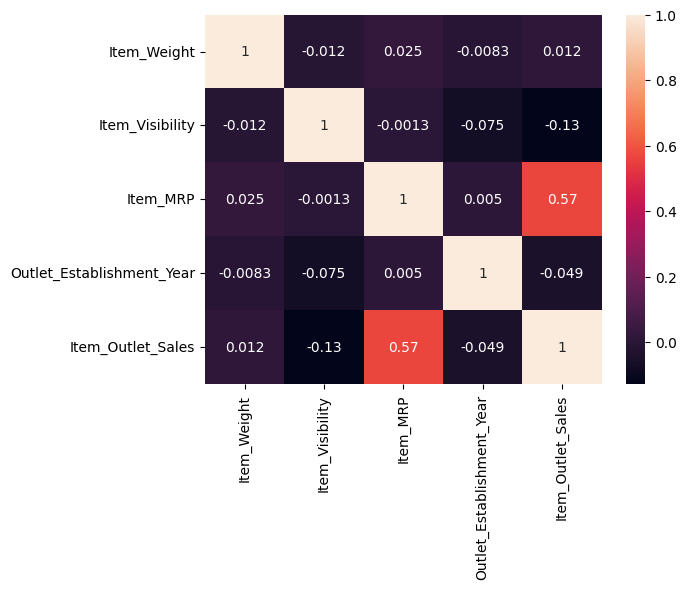

In [ ]:
sns.heatmap(df_train.corr(),annot=True)
plt.show()

EDA Using Klib Library

In [ ]:
!pip install klib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import klib

GridSpec(6, 5)

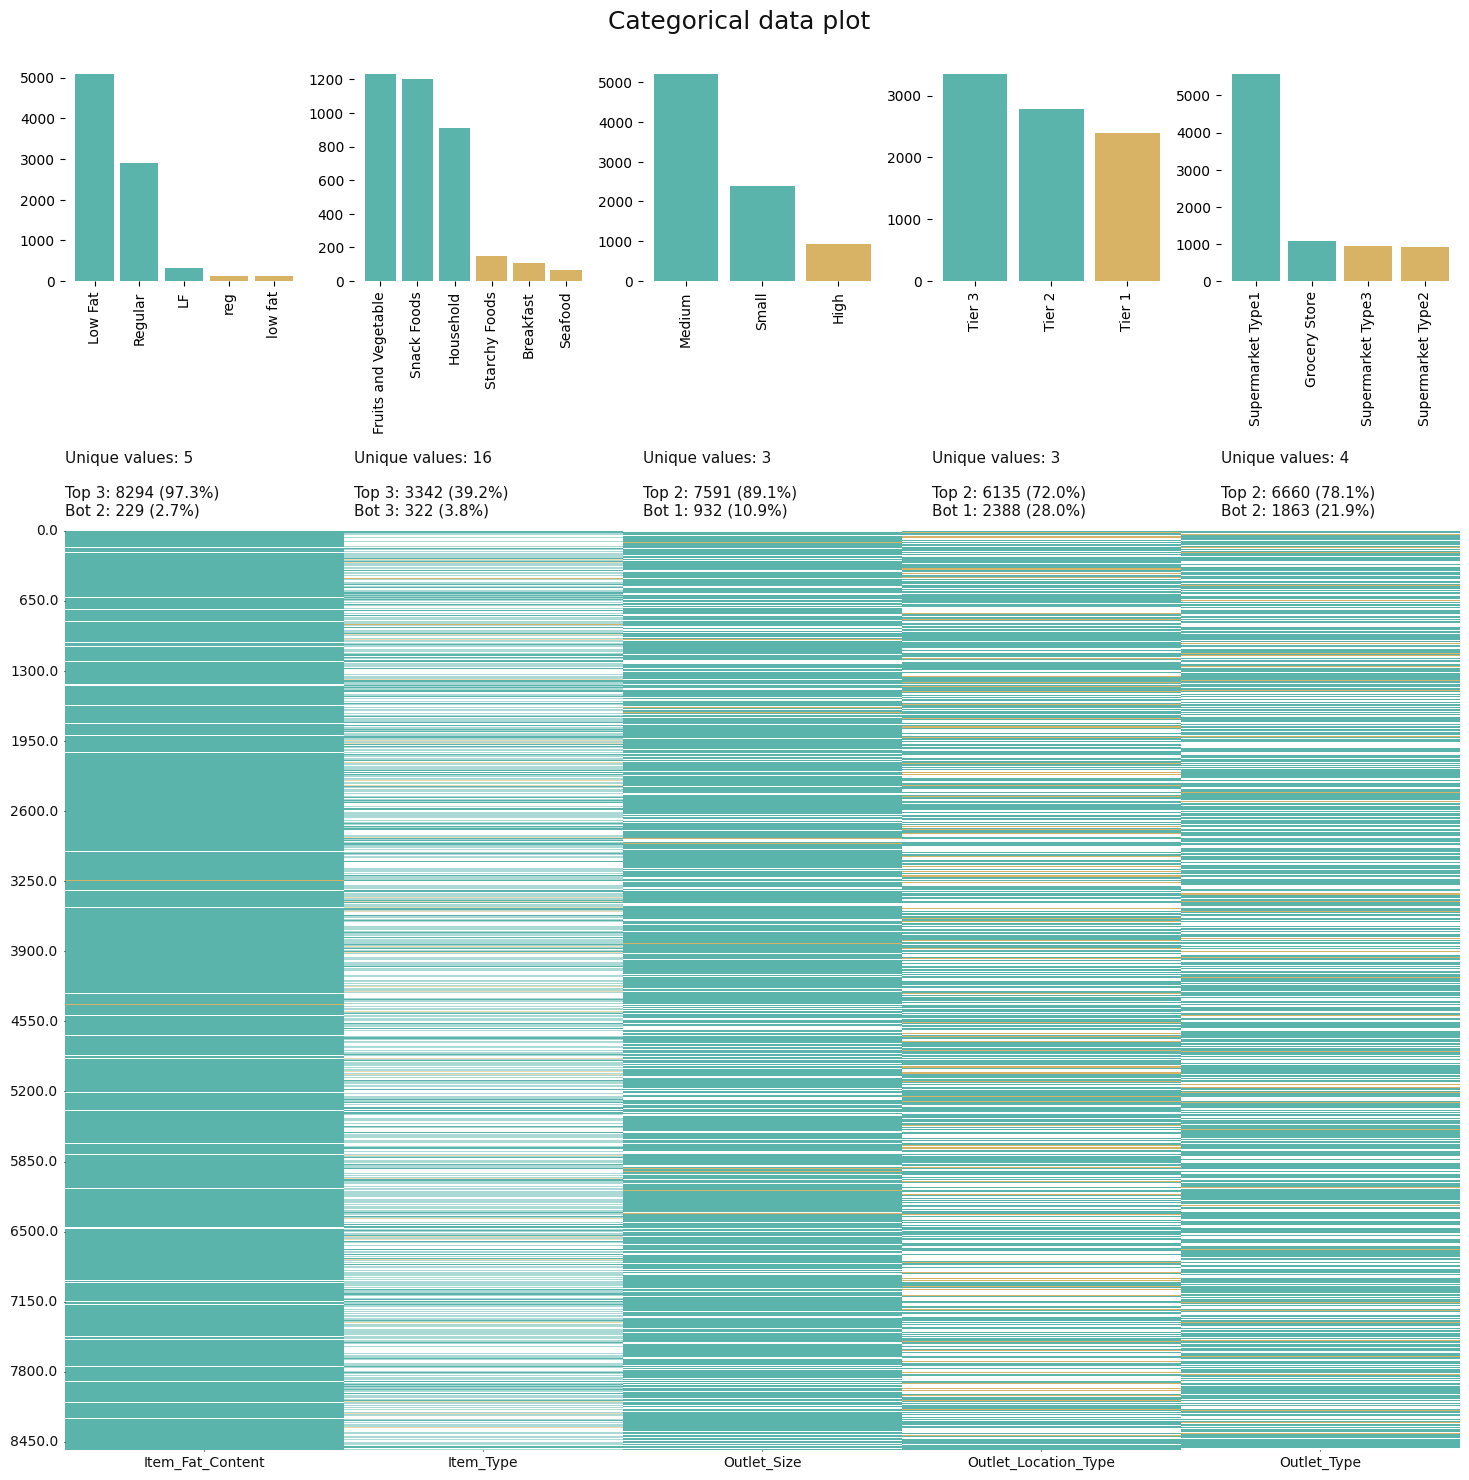

In [ ]:
klib.cat_plot(df_train)

EDA Using Pandas Profiling

In [ ]:
!pip install pandas_profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.9/345.9 kB 28.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.8/679.8 kB 45.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.8/33.8 MB 43.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 24.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 88.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 56.1 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27096 sha256=f26abe280b81269aef45ed382312d25d66ab6aa0ad440b

In [ ]:
import pandas_profiling

<ipython-input-28-6a00893fb3e1>:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


In [ ]:
report = pandas_profiling.ProfileReport(df_train)

# Display the report
report.to_widgets()

/usr/local/lib/python3.9/dist-packages/pandas_profiling/profile_report.py:457: UserWarning: Ipywidgets is not yet fully supported on Google Colab (https://github.com/googlecolab/colabtools/issues/60).As an alternative, you can use the HTML report. See the documentation for more information.
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
report

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

EDA with Dtale Library

In [ ]:
!pip install dtale

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 38.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 52.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 642.7/642.7 kB 26.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 57.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 219.7/219.7 kB 22.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.9/45.9 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.2/357.2 kB 29.1 MB/s eta 0:00:00
  Created whe

In [ ]:
import dtale

In [ ]:
d_report= dtale.show(df_train)

In [ ]:
d_report.open_browser()

In [ ]:
klib.missingval_plot(df_train)


No missing values found in the dataset.


Displaying positive correlations. Specify a positive "threshold" to limit the results further.
Displaying negative correlations. Specify a negative "threshold" to limit the results further.


<Axes: title={'center': 'Feature-correlation (pearson)'}>

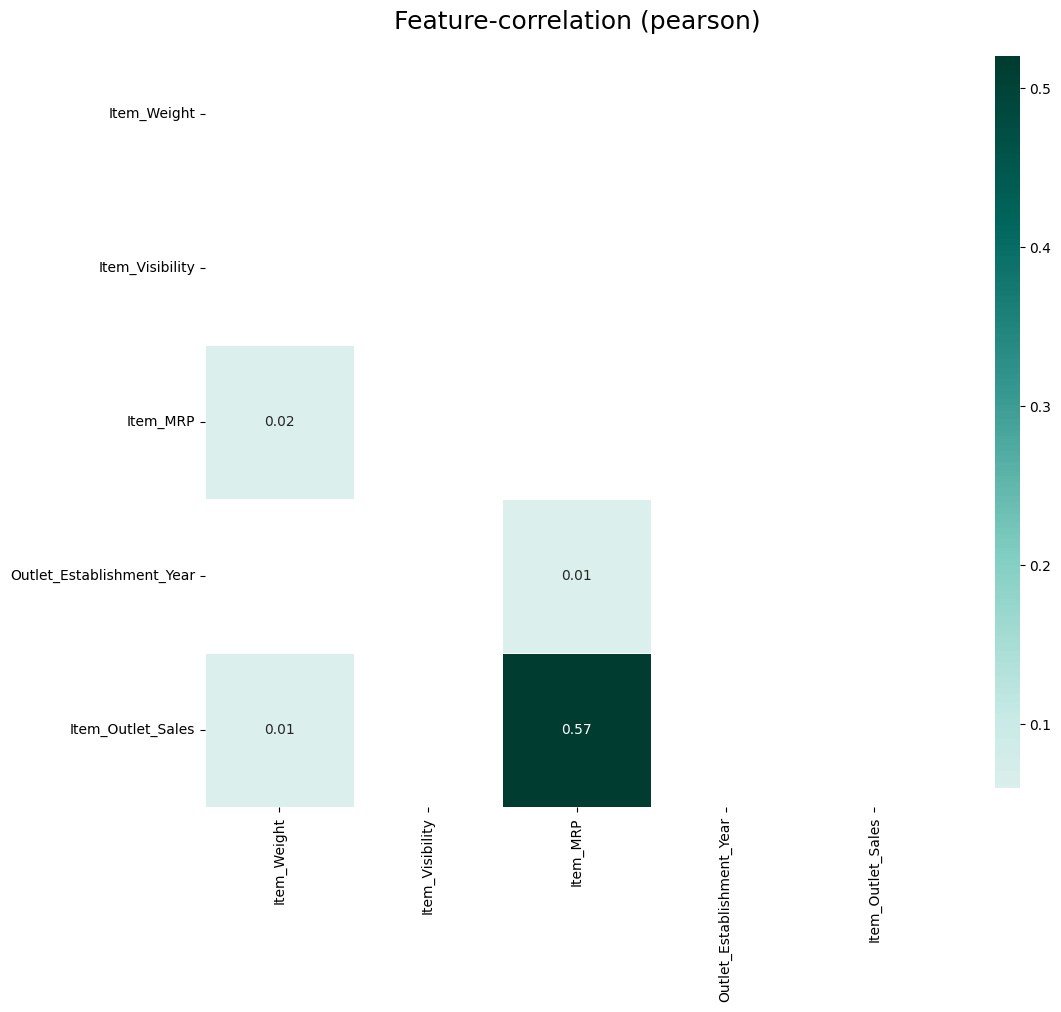

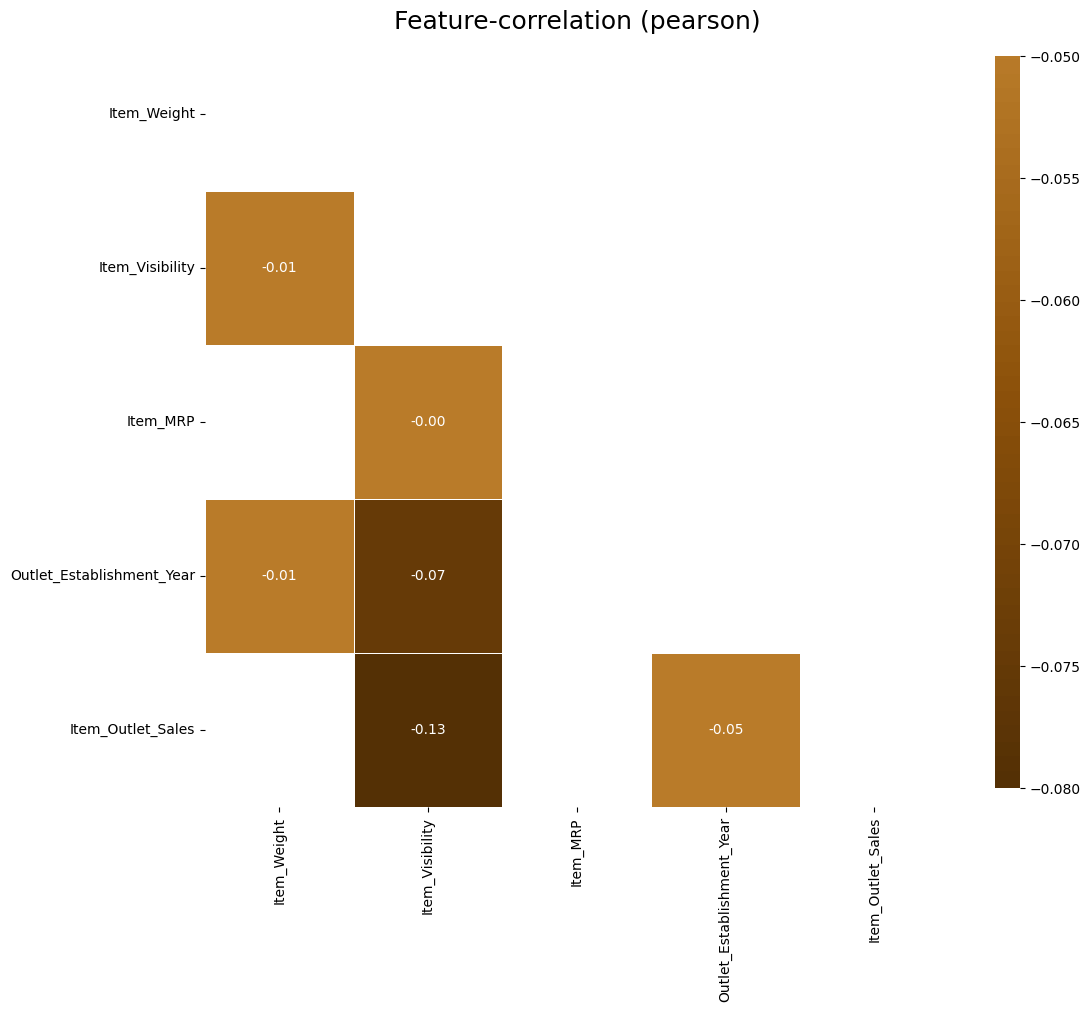

In [ ]:
klib.corr_plot(df_train, split='pos') # displaying only positive correlations, other settings include threshold, cmap...
klib.corr_plot(df_train, split='neg') # displaying only negative correlations

ValueError: ignored

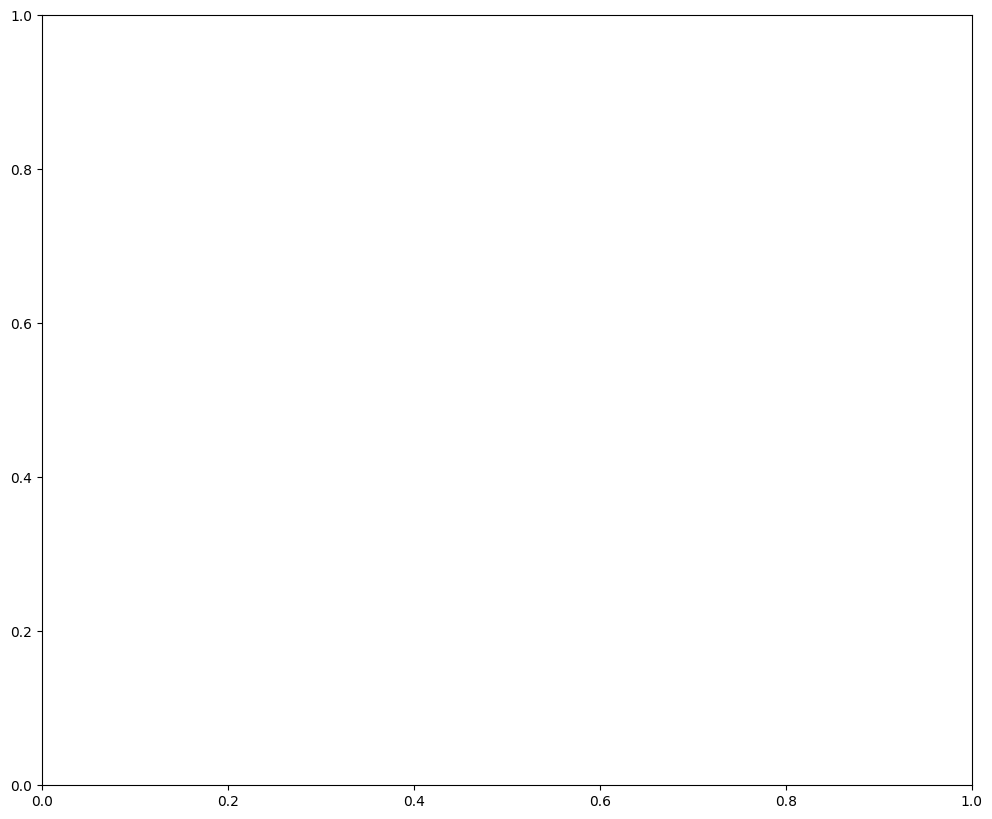

In [ ]:
klib.corr_plot(df_train, target='Item_Weight') # default representation of correlations with the feature column

In [ ]:
klib.corr_mat(df_train)

<Axes: xlabel='Item_Outlet_Sales', ylabel='Density'>

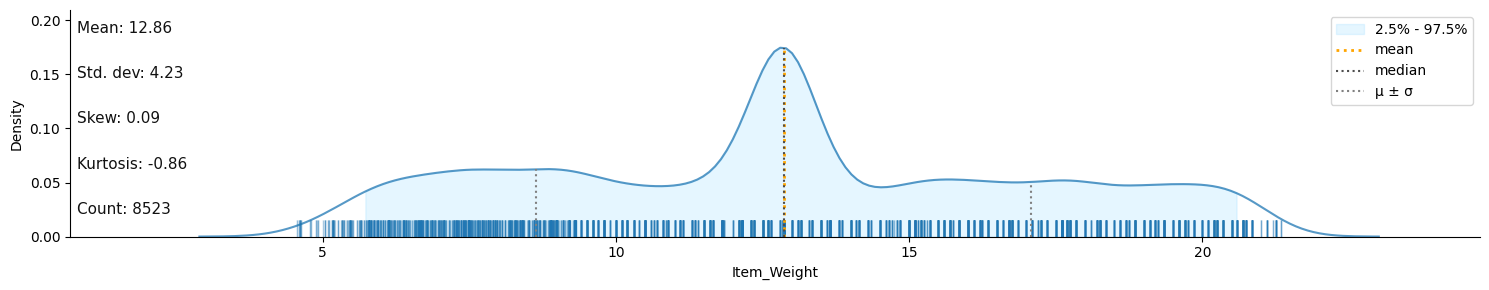

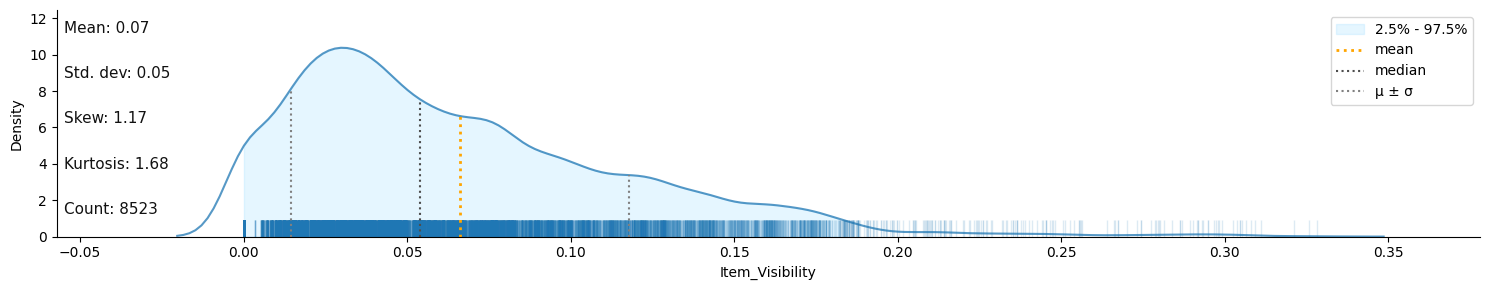

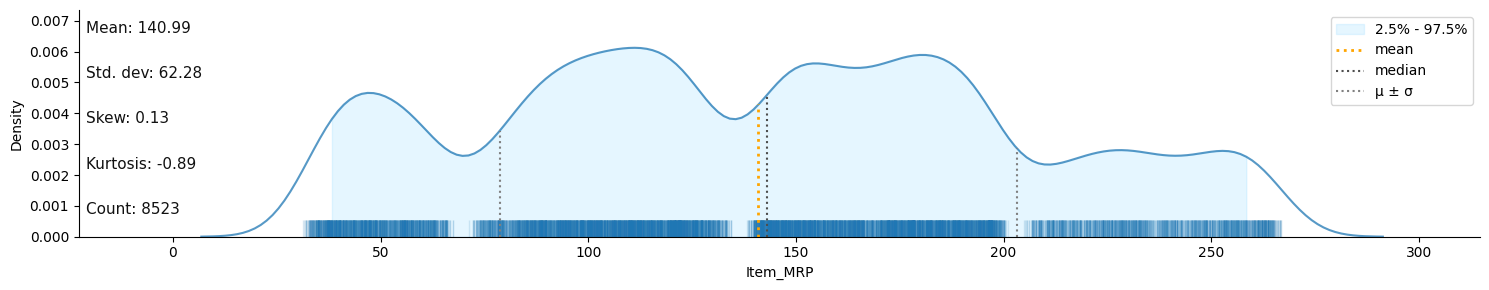

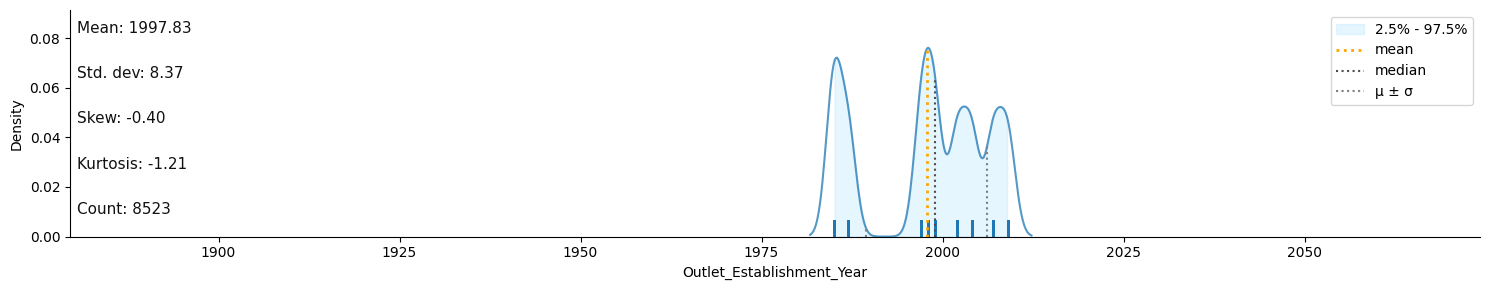

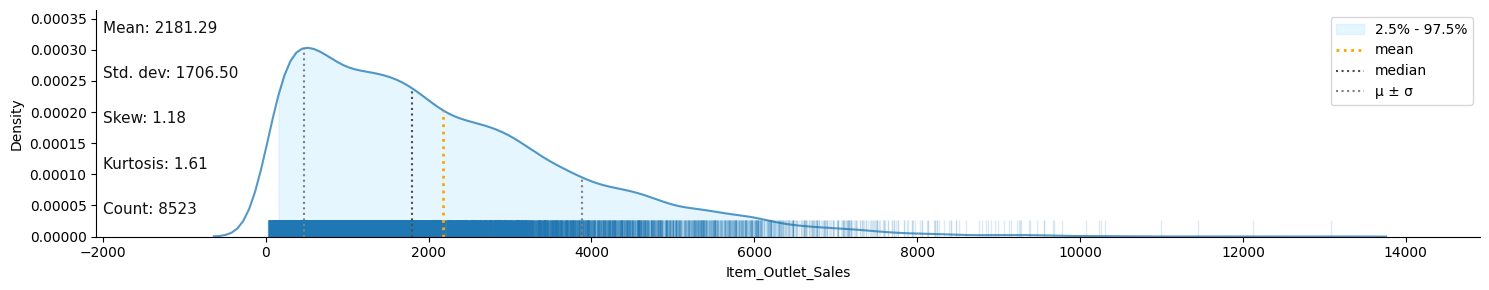

In [ ]:
klib.dist_plot(df_train)

Data Cleaning

In [ ]:
klib.data_cleaning(df_train) # performs datacleaning (drop duplicates & empty rows/cols, adjust dtypes,...)

Shape of cleaned data: (8523, 10) - Remaining NAs: 0


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 0.46 MB (-70.77%)



item_weight item_fat_content  item_visibility              item_type  \
0        9.300000          Low Fat         0.016047                  Dairy   
1        5.920000          Regular         0.019278            Soft Drinks   
2       17.500000          Low Fat         0.016760                   Meat   
3       19.200001          Regular         0.000000  Fruits and Vegetables   
4        8.930000          Low Fat         0.000000              Household   
...           ...              ...              ...                    ...   
8518     6.865000          Low Fat         0.056783            Snack Foods   
8519     8.380000          Regular         0.046982           Baking Goods   
8520    10.600000          Low Fat         0.035186     Health and Hygiene   
8521     7.210000          Regular         0.145221            Snack Foods   
8522    14.800000          Low Fat         0.044878            Soft Drinks   

        item_mrp  outlet_establishment_year outlet_size outlet_location_type  \
0     249.809204                       1999      Medium               Tier 1   
1      48.269199                       2009      Medium               Tier 3   
2     141.617996                       1999      Medium               Tier 1   
3     182.095001                       1998      Medium               Tier 3   
4      53.861401                       1987        High               Tier 3   
...          ...                        ...         ...                  ...   
8518  214.521805                       1987        High               Tier 3   
8519  108.156998                       2002      Medium               Tier 2   
8520   85.122398                       2004       Small               Tier 2   
8521  103.133202                       2009      Medium               Tier 3   
8522   75.467003                       1997       Small               Tier 1   

            outlet_type  item_outlet_sales  
0     Supermarket Type1        3735.137939  
1     Supermarket Type2         443.422791  
2     Supermarket Type1        2097.270020  
3         Grocery Store         732.380005  
4     Supermarket Type1         994.705200  
...                 ...                ...  
8518  Supermarket Type1        2778.383301  
8519  Supermarket Type1         549.284973  
8520  Supermarket Type1        1193.113647  
8521  Supermarket Type2        1845.597656  
8522  Supermarket Type1         765.669983  

[8523 rows x 10 columns]

In [ ]:
klib.clean_column_names(df_train) # cleans and standardizes column names, also called inside data_cleaning()

item_weight item_fat_content  item_visibility              item_type  \
0           9.300          Low Fat         0.016047                  Dairy   
1           5.920          Regular         0.019278            Soft Drinks   
2          17.500          Low Fat         0.016760                   Meat   
3          19.200          Regular         0.000000  Fruits and Vegetables   
4           8.930          Low Fat         0.000000              Household   
...           ...              ...              ...                    ...   
8518        6.865          Low Fat         0.056783            Snack Foods   
8519        8.380          Regular         0.046982           Baking Goods   
8520       10.600          Low Fat         0.035186     Health and Hygiene   
8521        7.210          Regular         0.145221            Snack Foods   
8522       14.800          Low Fat         0.044878            Soft Drinks   

      item_mrp  outlet_establishment_year outlet_size outlet_location_type  \
0     249.8092                       1999      Medium               Tier 1   
1      48.2692                       2009      Medium               Tier 3   
2     141.6180                       1999      Medium               Tier 1   
3     182.0950                       1998      Medium               Tier 3   
4      53.8614                       1987        High               Tier 3   
...        ...                        ...         ...                  ...   
8518  214.5218                       1987        High               Tier 3   
8519  108.1570                       2002      Medium               Tier 2   
8520   85.1224                       2004       Small               Tier 2   
8521  103.1332                       2009      Medium               Tier 3   
8522   75.4670                       1997       Small               Tier 1   

            outlet_type  item_outlet_sales  
0     Supermarket Type1          3735.1380  
1     Supermarket Type2           443.4228  
2     Supermarket Type1          2097.2700  
3         Grocery Store           732.3800  
4     Supermarket Type1           994.7052  
...                 ...                ...  
8518  Supermarket Type1          2778.3834  
8519  Supermarket Type1           549.2850  
8520  Supermarket Type1          1193.1136  
8521  Supermarket Type2          1845.5976  
8522  Supermarket Type1           765.6700  

[8523 rows x 10 columns]

In [ ]:
klib.convert_datatypes(df_train) # converts existing to more efficient dtypes, also called inside data_cleaning()

item_weight item_fat_content  item_visibility              item_type  \
0        9.300000          Low Fat         0.016047                  Dairy   
1        5.920000          Regular         0.019278            Soft Drinks   
2       17.500000          Low Fat         0.016760                   Meat   
3       19.200001          Regular         0.000000  Fruits and Vegetables   
4        8.930000          Low Fat         0.000000              Household   
...           ...              ...              ...                    ...   
8518     6.865000          Low Fat         0.056783            Snack Foods   
8519     8.380000          Regular         0.046982           Baking Goods   
8520    10.600000          Low Fat         0.035186     Health and Hygiene   
8521     7.210000          Regular         0.145221            Snack Foods   
8522    14.800000          Low Fat         0.044878            Soft Drinks   

        item_mrp  outlet_establishment_year outlet_size outlet_location_type  \
0     249.809204                       1999      Medium               Tier 1   
1      48.269199                       2009      Medium               Tier 3   
2     141.617996                       1999      Medium               Tier 1   
3     182.095001                       1998      Medium               Tier 3   
4      53.861401                       1987        High               Tier 3   
...          ...                        ...         ...                  ...   
8518  214.521805                       1987        High               Tier 3   
8519  108.156998                       2002      Medium               Tier 2   
8520   85.122398                       2004       Small               Tier 2   
8521  103.133202                       2009      Medium               Tier 3   
8522   75.467003                       1997       Small               Tier 1   

            outlet_type  item_outlet_sales  
0     Supermarket Type1        3735.137939  
1     Supermarket Type2         443.422791  
2     Supermarket Type1        2097.270020  
3         Grocery Store         732.380005  
4     Supermarket Type1         994.705200  
...                 ...                ...  
8518  Supermarket Type1        2778.383301  
8519  Supermarket Type1         549.284973  
8520  Supermarket Type1        1193.113647  
8521  Supermarket Type2        1845.597656  
8522  Supermarket Type1         765.669983  

[8523 rows x 10 columns]

In [ ]:
klib.drop_missing(df_train) # drops missing values, also called in data_cleaning()

item_weight item_fat_content  item_visibility              item_type  \
0           9.300          Low Fat         0.016047                  Dairy   
1           5.920          Regular         0.019278            Soft Drinks   
2          17.500          Low Fat         0.016760                   Meat   
3          19.200          Regular         0.000000  Fruits and Vegetables   
4           8.930          Low Fat         0.000000              Household   
...           ...              ...              ...                    ...   
8518        6.865          Low Fat         0.056783            Snack Foods   
8519        8.380          Regular         0.046982           Baking Goods   
8520       10.600          Low Fat         0.035186     Health and Hygiene   
8521        7.210          Regular         0.145221            Snack Foods   
8522       14.800          Low Fat         0.044878            Soft Drinks   

      item_mrp  outlet_establishment_year outlet_size outlet_location_type  \
0     249.8092                       1999      Medium               Tier 1   
1      48.2692                       2009      Medium               Tier 3   
2     141.6180                       1999      Medium               Tier 1   
3     182.0950                       1998      Medium               Tier 3   
4      53.8614                       1987        High               Tier 3   
...        ...                        ...         ...                  ...   
8518  214.5218                       1987        High               Tier 3   
8519  108.1570                       2002      Medium               Tier 2   
8520   85.1224                       2004       Small               Tier 2   
8521  103.1332                       2009      Medium               Tier 3   
8522   75.4670                       1997       Small               Tier 1   

            outlet_type  item_outlet_sales  
0     Supermarket Type1          3735.1380  
1     Supermarket Type2           443.4228  
2     Supermarket Type1          2097.2700  
3         Grocery Store           732.3800  
4     Supermarket Type1           994.7052  
...                 ...                ...  
8518  Supermarket Type1          2778.3834  
8519  Supermarket Type1           549.2850  
8520  Supermarket Type1          1193.1136  
8521  Supermarket Type2          1845.5976  
8522  Supermarket Type1           765.6700  

[8523 rows x 10 columns]

In [ ]:
klib.mv_col_handling(df_train) # drops features with high ratio of missing vals based on informational content

item_weight item_fat_content  item_visibility              item_type  \
0           9.300          Low Fat         0.016047                  Dairy   
1           5.920          Regular         0.019278            Soft Drinks   
2          17.500          Low Fat         0.016760                   Meat   
3          19.200          Regular         0.000000  Fruits and Vegetables   
4           8.930          Low Fat         0.000000              Household   
...           ...              ...              ...                    ...   
8518        6.865          Low Fat         0.056783            Snack Foods   
8519        8.380          Regular         0.046982           Baking Goods   
8520       10.600          Low Fat         0.035186     Health and Hygiene   
8521        7.210          Regular         0.145221            Snack Foods   
8522       14.800          Low Fat         0.044878            Soft Drinks   

      item_mrp  outlet_establishment_year outlet_size outlet_location_type  \
0     249.8092                       1999      Medium               Tier 1   
1      48.2692                       2009      Medium               Tier 3   
2     141.6180                       1999      Medium               Tier 1   
3     182.0950                       1998      Medium               Tier 3   
4      53.8614                       1987        High               Tier 3   
...        ...                        ...         ...                  ...   
8518  214.5218                       1987        High               Tier 3   
8519  108.1570                       2002      Medium               Tier 2   
8520   85.1224                       2004       Small               Tier 2   
8521  103.1332                       2009      Medium               Tier 3   
8522   75.4670                       1997       Small               Tier 1   

            outlet_type  item_outlet_sales  
0     Supermarket Type1          3735.1380  
1     Supermarket Type2           443.4228  
2     Supermarket Type1          2097.2700  
3         Grocery Store           732.3800  
4     Supermarket Type1           994.7052  
...                 ...                ...  
8518  Supermarket Type1          2778.3834  
8519  Supermarket Type1           549.2850  
8520  Supermarket Type1          1193.1136  
8521  Supermarket Type2          1845.5976  
8522  Supermarket Type1           765.6700  

[8523 rows x 10 columns]

In [ ]:
- klib.pool_duplicate_subsets(df_train) # pools subset of cols based on duplicates with min. loss of information

item_visibility  item_mrp  item_outlet_sales  pooled_vars
0           -0.016047 -249.8092         -3735.1380            0
1           -0.019278  -48.2692          -443.4228           -1
2           -0.016760 -141.6180         -2097.2700           -2
3           -0.000000 -182.0950          -732.3800           -3
4           -0.000000  -53.8614          -994.7052           -4
...               ...       ...                ...          ...
8518        -0.056783 -214.5218         -2778.3834        -8518
8519        -0.046982 -108.1570          -549.2850        -8519
8520        -0.035186  -85.1224         -1193.1136        -8520
8521        -0.145221 -103.1332         -1845.5976        -8521
8522        -0.044878  -75.4670          -765.6700        -8522

[8523 rows x 4 columns]

Preprocessing Task Before Model Building

In [ ]:
df_train

item_weight item_fat_content  item_visibility              item_type  \
0           9.300          Low Fat         0.016047                  Dairy   
1           5.920          Regular         0.019278            Soft Drinks   
2          17.500          Low Fat         0.016760                   Meat   
3          19.200          Regular         0.000000  Fruits and Vegetables   
4           8.930          Low Fat         0.000000              Household   
...           ...              ...              ...                    ...   
8518        6.865          Low Fat         0.056783            Snack Foods   
8519        8.380          Regular         0.046982           Baking Goods   
8520       10.600          Low Fat         0.035186     Health and Hygiene   
8521        7.210          Regular         0.145221            Snack Foods   
8522       14.800          Low Fat         0.044878            Soft Drinks   

      item_mrp  outlet_establishment_year outlet_size outlet_location_type  \
0     249.8092                       1999      Medium               Tier 1   
1      48.2692                       2009      Medium               Tier 3   
2     141.6180                       1999      Medium               Tier 1   
3     182.0950                       1998      Medium               Tier 3   
4      53.8614                       1987        High               Tier 3   
...        ...                        ...         ...                  ...   
8518  214.5218                       1987        High               Tier 3   
8519  108.1570                       2002      Medium               Tier 2   
8520   85.1224                       2004       Small               Tier 2   
8521  103.1332                       2009      Medium               Tier 3   
8522   75.4670                       1997       Small               Tier 1   

            outlet_type  item_outlet_sales  
0     Supermarket Type1          3735.1380  
1     Supermarket Type2           443.4228  
2     Supermarket Type1          2097.2700  
3         Grocery Store           732.3800  
4     Supermarket Type1           994.7052  
...                 ...                ...  
8518  Supermarket Type1          2778.3834  
8519  Supermarket Type1           549.2850  
8520  Supermarket Type1          1193.1136  
8521  Supermarket Type2          1845.5976  
8522  Supermarket Type1           765.6700  

[8523 rows x 10 columns]

# 1. Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le= LabelEncoder()

In [ ]:

df_train["item_type"]= le.fit_transform(df_train["item_type"])
df_train["outlet_size"]= le.fit_transform(df_train["outlet_size"])
df_train["outlet_location_type"]= le.fit_transform(df_train["outlet_location_type"])
df_train["outlet_type"]= le.fit_transform(df_train["outlet_type"])
df_train['item_fat_content']= le.fit_transform(df_train['item_fat_content'])

In [ ]:
df_train.head()

item_weight  item_fat_content  item_visibility  item_type  item_mrp  \
0         9.30                 1         0.016047          4  249.8092   
1         5.92                 2         0.019278         14   48.2692   
2        17.50                 1         0.016760         10  141.6180   
3        19.20                 2         0.000000          6  182.0950   
4         8.93                 1         0.000000          9   53.8614   

   outlet_establishment_year  outlet_size  outlet_location_type  outlet_type  \
0                       1999            1                     0            1   
1                       2009            1                     2            2   
2                       1999            1                     0            1   
3                       1998            1                     2            0   
4                       1987            0                     2            1   

   item_outlet_sales  
0          3735.1380  
1           443.4228  
2          2097.2700  
3           732.3800  
4           994.7052

In [ ]:
# df_train= pd.get_dummies(df_train, columns=['item_fat_content', 'outlet_size', 'outlet_location_type','outlet_type' ])

# 2. Splitting our data into train and test

In [ ]:
x= df_train.drop('item_outlet_sales', axis=1)


In [ ]:
y= df_train['item_outlet_sales']

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=101, test_size=0.2)

In [ ]:
x_train

item_weight  item_fat_content  item_visibility  item_type  item_mrp  \
3684       19.250                 1         0.101689          4   54.6956   
1935        7.630                 1         0.061410         14   94.6436   
5142       19.350                 2         0.065891         10  167.0816   
4978        6.380                 0         0.031898          4  177.4344   
2299       16.700                 1         0.022110          4  110.8886   
...           ...               ...              ...        ...       ...   
599         5.000                 1         0.044005         14  188.8530   
5695       14.650                 1         0.170664          7   56.4614   
8006       12.500                 1         0.018849          8   96.7384   
1361        9.695                 2         0.129009          0  226.9404   
1547       15.700                 1         0.161317          9   57.5562   

      outlet_establishment_year  outlet_size  outlet_location_type  \
3684                       1987            0                     2   
1935                       2007            1                     1   
5142                       2007            1                     1   
4978                       1997            2                     0   
2299                       2002            1                     1   
...                         ...          ...                   ...   
599                        1997            2                     0   
5695                       2002            1                     1   
8006                       1997            2                     0   
1361                       2007            1                     1   
1547                       2009            1                     2   

      outlet_type  
3684            1  
1935            1  
5142            1  
4978            1  
2299            1  
...           ...  
599             1  
5695            1  
8006            1  
1361            1  
1547            2  

[6818 rows x 9 columns]

# 3. Standardization

In [ ]:
x.describe()

item_weight  item_fat_content  item_visibility    item_type  \
count  8523.000000       8523.000000      8523.000000  8523.000000   
mean     12.857645          1.369354         0.066132     7.226681   
std       4.226124          0.644810         0.051598     4.209990   
min       4.555000          0.000000         0.000000     0.000000   
25%       9.310000          1.000000         0.026989     4.000000   
50%      12.857645          1.000000         0.053931     6.000000   
75%      16.000000          2.000000         0.094585    10.000000   
max      21.350000          4.000000         0.328391    15.000000   

          item_mrp  outlet_establishment_year  outlet_size  \
count  8523.000000                8523.000000  8523.000000   
mean    140.992782                1997.831867     1.170832   
std      62.275067                   8.371760     0.600327   
min      31.290000                1985.000000     0.000000   
25%      93.826500                1987.000000     1.000000   
50%     143.012800                1999.000000     1.000000   
75%     185.643700                2004.000000     2.000000   
max     266.888400                2009.000000     2.000000   

       outlet_location_type  outlet_type  
count           8523.000000  8523.000000  
mean               1.112871     1.201220  
std                0.812757     0.796459  
min                0.000000     0.000000  
25%                0.000000     1.000000  
50%                1.000000     1.000000  
75%                2.000000     1.000000  
max                2.000000     3.000000

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [ ]:
x_train_std= sc.fit_transform(x_train)

In [ ]:
x_test_std=sc.transform(x_test)

In [ ]:
x_train_std

array([[ 1.52290029, -0.57382672,  0.68469729, ..., -1.95699503,
         1.08786619, -0.25964107],
       [-1.23985603, -0.57382672, -0.09514748, ..., -0.28872895,
        -0.13870429, -0.25964107],
       [ 1.54667616,  0.97378032, -0.00838589, ..., -0.28872895,
        -0.13870429, -0.25964107],
       ...,
       [-0.08197107, -0.57382672, -0.9191623 , ...,  1.37953713,
        -1.36527477, -0.25964107],
       [-0.74888428,  0.97378032,  1.21363058, ..., -0.28872895,
        -0.13870429, -0.25964107],
       [ 0.67885683, -0.57382672,  1.83915356, ..., -0.28872895,
         1.08786619,  0.98524841]])

In [ ]:
  x_test_std

array([[-0.43860915, -0.57382672, -0.21609255, ..., -0.28872895,
         1.08786619,  0.98524841],
       [ 1.22570189, -0.57382672, -0.52943461, ..., -1.95699503,
         1.08786619, -0.25964107],
       [-1.21845775,  0.97378032,  0.16277342, ...,  1.37953713,
        -1.36527477, -0.25964107],
       ...,
       [ 0.65508096, -0.57382672,  0.87824237, ..., -0.28872895,
         1.08786619, -1.50453056],
       [ 1.01171904, -0.57382672, -1.28409256, ..., -0.28872895,
         1.08786619,  0.98524841],
       [-1.56558548,  0.97378032, -1.09265374, ..., -0.28872895,
        -0.13870429, -0.25964107]])

In [ ]:
y_train

3684     163.7868
1935    1607.2412
5142    1510.0344
4978    1784.3440
2299    3558.0352
          ...    
599     5502.8370
5695    1436.7964
8006    2167.8448
1361    2700.4848
1547     829.5868
Name: item_outlet_sales, Length: 6818, dtype: float64

In [ ]:
y_test

8179     904.8222
8355    2795.6942
3411    1947.4650
7089     872.8638
6954    2450.1440
          ...    
1317    1721.0930
4996     914.8092
531      370.1848
3891    1358.2320
6629    2418.1856
Name: item_outlet_sales, Length: 1705, dtype: float64

In [ ]:
import joblib

In [ ]:
joblib.dump(sc, r'C:\Users\USER\Desktop\Pyhon Project From Other Social Media Sources\Future Sales Prediction\BigMartSalesAnalysis\models\sc.sav')

['C:\\Users\\USER\\Desktop\\Pyhon Project From Other Social Media Sources\\Future Sales Prediction\\BigMartSalesAnalysis\\models\\sc.sav']

# Model Building

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [ ]:
lr.fit(x_train_std, y_train)

LinearRegression()

In [ ]:
y_pred_lr= lr.predict(x_test_std)

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error 

In [ ]:
print(r2_score(y_test, y_pred_lr))
print(mean_absolute_error(y_test,y_pred_lr))
print(np.sqrt(mean_squared_error(y_test,y_pred_lr)))

0.5041875762809336
880.9999067141265
1162.4412660891485


Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor()

In [ ]:
rf.fit(x_train, y_train)

RandomForestRegressor()

In [ ]:
y_pred_rf= rf.predict(x_test)

In [ ]:
print(r2_score(y_test, y_pred_rf))
print(mean_absolute_error(y_test,y_pred_rf))
print(np.sqrt(mean_squared_error(y_test,y_pred_rf)))

0.5482553418776362
782.7702158557186
1109.580534523078


In [ ]:
import joblib

In [95]:
joblib.dump(rf,r'C:\Users\USER\Desktop\Pyhon Project From Other Social Media Sources\Future Sales Prediction\BigMartSalesAnalysis\models\rf.sav')

['C:\\Users\\USER\\Desktop\\Pyhon Project From Other Social Media Sources\\Future Sales Prediction\\BigMartSalesAnalysis\\models\\rf.sav']

Model Optimization

# Hyper Parameter Tuning

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

#defining model and parameters 
model = RandomForestRegressor()
n_estimators= [10,100,1000]
max_depth= range(1,31)
min_samples_leaf= np.linspace(0.1,1.0)
max_features= ['auto', 'sqrt','log2']
min_samples_split= np.linspace(0.1, 1.0, 10)

# Defining grid search

grid= dict(n_estimators=n_estimators)
cv= RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=101)
grid_search_forest= GridSearchCV(estimator=model, param_grid=grid, n_jobs=1,
                                 scoring='r2', error_score=0, verbose=2, cv=2)
grid_search_forest.fit(x_train_std, y_train)

# Summarizing results
print(f"Best: {grid_search_forest.best_score_: 3f} using {grid_search_forest.best_params_}")
means= grid_search_forest.cv_results_["mean_test_score"]
std= grid_search_forest.cv_results_["std_test_score"]
param= grid_search_forest.cv_results_["params"]



for mean, stdev, param in zip(means, std, param):
  print(f"{mean: 3f} ({stdev:3f}) with: {param}")

Fitting 2 folds for each of 3 candidates, totalling 6 fits
[CV] END ....................................n_estimators=10; total time=   0.2s
[CV] END ....................................n_estimators=10; total time=   0.2s
[CV] END ...................................n_estimators=100; total time=   2.3s
[CV] END ...................................n_estimators=100; total time=   2.3s
[CV] END ..................................n_estimators=1000; total time=  20.0s
[CV] END ..................................n_estimators=1000; total time=  17.7s
Best:  0.549993 using {'n_estimators': 1000}
 0.514887 (0.000785) with: {'n_estimators': 10}
 0.545086 (0.003957) with: {'n_estimators': 100}
 0.549993 (0.005201) with: {'n_estimators': 1000}
